High Level Statitics Of the Dataset:
important points : 
1.each of the row called as an observations or data points or independent variable.
2.for mathematician data points are Vectors.
3.Status column is a class label or dependent variable.this is what we need to predict given this 4 features.
4.vector: n-dimensional numerical array. eg:[[30,64,1,1]]
5.scalar: 1-dimensional array. eg:[30]
6.imbalanced data are skewed data




 Obective:The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore") 
%matplotlib inline

In [5]:
# load haberman.csv into a pandas dataframe
haberman = pd.read_csv('downloads/haberman.csv')

In [6]:
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [7]:
#columns names in the dataset
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

Attributes Information:
There are 4 attribute as per the dataset above

Age of patient at time of operation (numerical) - 30
Patient's year of operation (year - 1900, numerical) - 64
Number of positive axillary nodes detected (numerical) - 1
Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year - 1.1

In [8]:
# how many data points or rows and features or columns
haberman.shape       #rows:306 ; columns:4

(306, 4)

In [9]:
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [10]:
# since we have 2 classes. how many datapoints for each class are present
haberman['status'].value_counts()
# balanced vs imbalanced datasets       
# our dataset is imbalanced since as the no of data points for each is not closer.

1    225
2     81
Name: status, dtype: int64

In [11]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [12]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


In [13]:
haberman.size

1224

Observations:
1.no of points: it contains 306 data points/rows
2.no of features/variables : there are 3 independent features/columns(age,year,nodes)
3.no of classes: there are 2 classes patient survival status : 1-the patient survived 5 years or longer 2 = the patient died within 5 year
4.datapoints per class: there are 225 data points for 1 and 85 for 2. it looks like imbalaced dataset

## 2-D scatter plot

In [14]:
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

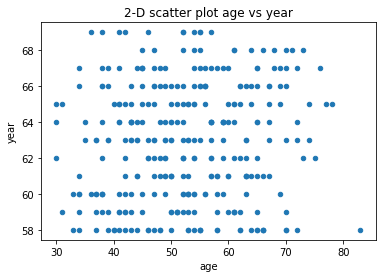

In [15]:
haberman.plot(x='age',y='year',kind='scatter',title='2-D scatter plot age vs year')
plt.show()
#this plot doesnt give any information about the classes

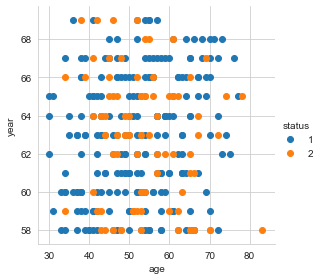

In [16]:
#2-D scatter plot with color coding
sns.set_style('whitegrid')
sns.FacetGrid(data=haberman,hue='status',size=4)\
.map(plt.scatter ,'age','year')\
.add_legend()
plt.show()

# how many combination exist 3c2=3

Observation: this plot doesnt gave any information of the classes since both the classes are overlapped and not easily distingushable

In [20]:
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

## 3-D Scatter Plot

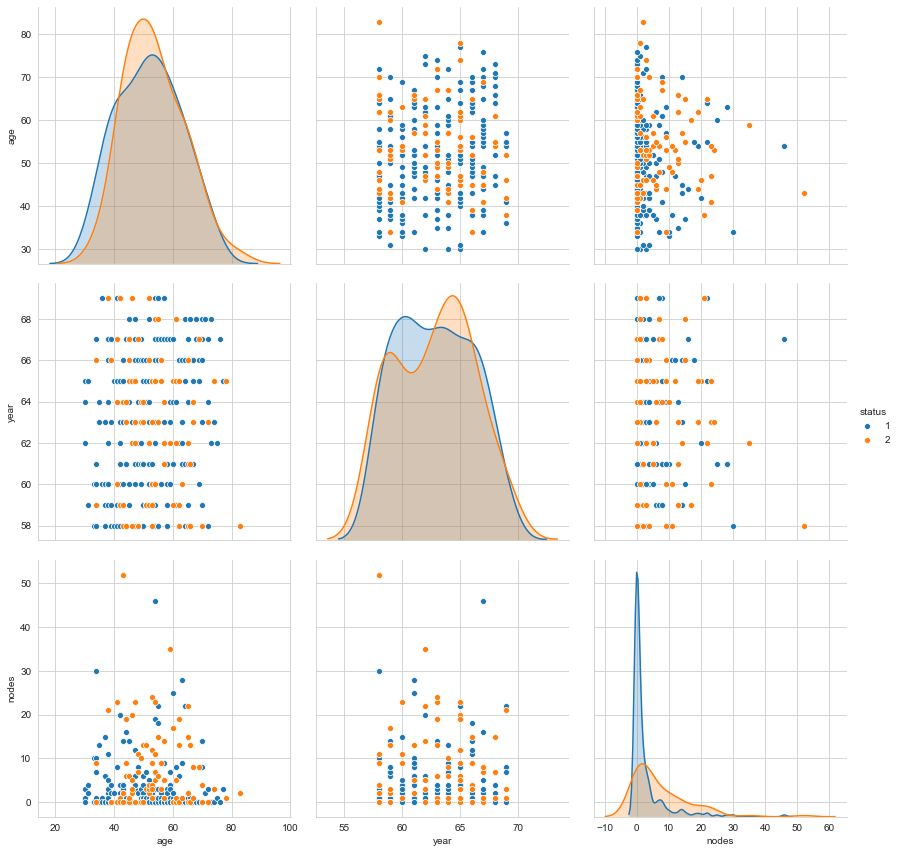

In [19]:
# this pair plot gives class dependiced w.r.to each variable/feature
plt.close()
sns.set_style('whitegrid')
sns.pairplot(haberman,hue='status',vars=['age', 'year', 'nodes'],height=4)
plt.show()
# how many combination exist 3c2=3. 3  2-dimensional plots it can create || (age,year),(year,nodes),(year,nodes)

1.these diagonals represents the PDF's of each features and suggests that classes are not easily seperable
2.each classes were overlapped in each varaible.thus, we cant draw linearly seperable line from any of plot

Limitations: 1.we have 4 dimensional data or 4 features.what if we have 10 (or) 100 (or)500 features.
then the combination will be 10C2 or 100C2 etc.,
NOTE : pair plots are easy to understand when then dimensionality of data or features are small.eg:4,5,6,7..
at bigger features we learn some techniques in linear algebra,principle component analysis,dimensionality reduction techniques etc.,

NOTE:1.Dimension reduction refers  to the preocess of converting a set of data having more dimensions  into data with lesser dimensions ensuring that it conveys similar information concisely.
These techniques typically used while solving machine learnig problems to obtain better features for a classification or regression task

2.Pairplot is made when you only want to visualize the relationship between two variables,where the variables can be continous,categorical or booleans. furthurmore,pairplot is usually a grid of plots for each variable in your dataset.
hence you can quickly see how all the variables are related.this can help to infere which variables are useful, which have skewed distribution etc,.

## Histogram, pdf, cdf

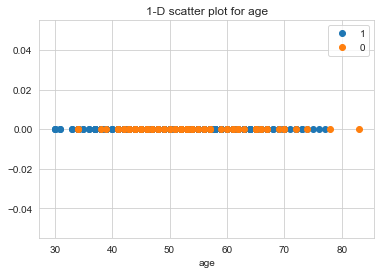

In [21]:
# What about 1-D scatter plot using just one feature?
# 1-D scatter plot of AGE
haberman_one = haberman.loc[haberman['status']==1]
haberman_two = haberman.loc[haberman['status']==2]

plt.plot(haberman_one['age'],np.zeros_like(haberman_one['age']),'o')
plt.plot(haberman_two['age'],np.zeros_like(haberman_two['age']),'o')
plt.legend('10')
plt.xlabel('age')
plt.title('1-D scatter plot for age')
plt.show()


# Disadvatages of 1-D scatter plot is very hard to make sense as points
# classes are overlapped a lot
# are there better way of visualising 1-D scatter plot : histogram

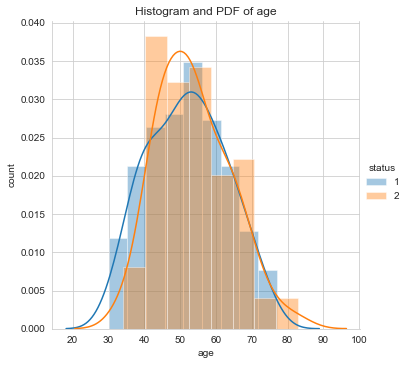

In [22]:
sns.FacetGrid(haberman,hue='status',height=5)\
.map(sns.distplot,'age')\
.add_legend()
plt.ylabel('count')
plt.title('Histogram and PDF of age')
plt.show()

# PDF : smoothed form of histogram using [KDE]
# pdf and historgam are extremely useful when you want to built models with one feature

Both the classes were overlapped. if age>=3 && age<75 : print('status 1') elif age>34 && age<82 : print('status 2')
the mean of both the classes is approximately equal and have to same distribution
the spread of variance of class wth patient survived 5 years if more than class the patient died with in 5 year of operation

## Univariate Analysis

In [129]:
#univariate analysis : one variable analysis
# i have 3 variables, which of these 3 variables is more useful than other to distinguish the classes
# we can answer them using univariate analysis: pdf or histograms
# pdf and histogram is used for univariate analysis
# pdf is very helpful when we have to dig deeper into a particular feature
# a histogram is a plot of the data you have collected.it can give yiu an idea about hoe the probability 
# distribution meaurement looks
# but it cannot give an accurate figure for the probabiity for how often your measurement falls some distance from the mean.




#Factegrid creates the grid and map is responsible for repeating the same plot on each space of the grid and add_legend()
#is to create legend in the plot

'\nFactegrid creates the grid and map is responsible for repeating the same plot on each space of the grid and add_legend()\nis to create legend in the plot'

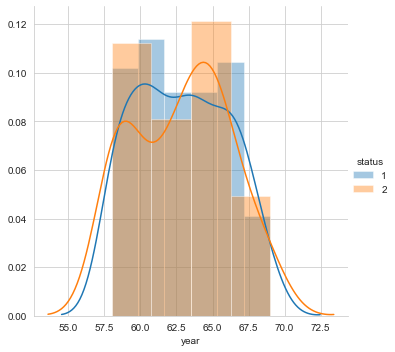

In [23]:
sns.FacetGrid(data=haberman,hue='status',height=5)\
.map(sns.distplot,'year')\
.add_legend()
plt.show()

both the classes are overlapped its difficult to classify or seperate the classes w.r.to year feature

In [126]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


# Interpreting a PDF:
## why is it called a density plot?
## Why is it called a probability plot?
## for each value of petal_length, what does the value on y-axis mean?
# Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
# Using just one feature, we can build a simple "model" suing if..else... statements.

# Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?

# Do some of these plots look like a bell-curve you studied in under-grad?
# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
# e.g: Hieghts of male students in a class.
# One of the most frequent distributions in nature.


'''1.# How bin width effects the PDF plot.
ans -> As we take the bin size smaller and smaller we are going towards the more and more accurate decisions? Am i right?

2. why is it called a density plot?
sol-> because each bin size refer to the density of the bin or (in more high level,we can say storage). the bin which has the more density that actually has the high probability and
the bin which has the less density that actually has the low probability. density is calculating by just how many data points it has divide by total datapoints in the dataset.


3.Why is it called a probability plot?
sol-> because we can calculate the probability of the interval means if we find new petal_length then what is the probablity actuallly it'll acutally place that interval.

4. what actually cdf is? how it differ from pdf ?
sol-> cdf-> If we take a single point in the x-axis -> By cdf we can calculate how much percent (x-axis values)less than this.
pdf-> SO with the pdf we can't calulate like if we give one point what percentage of values less than this. but by pdf we can calcualte the intervals like (in 15-10 intreval) the probability of event happens is 50%.
'''

## CDF

In [130]:
# CDF: Sum of each bins in PDF
# PDF: it is smoothing curve of histogram

# our histogram function np.histogram returns 1)counts 2)bin_edges
# bin_edges : eg: bins=n=4, bin_edges= n+1=5      [0,1.5,1.8,2,3]
# counts : in each bin how many points do we have>(numeric value)
# bin: a bin is range that represents the width of a single bar of the histogram along the x-axis.we can also called as interval
# eg:[2,4,5,8]
# but we want PDF --> so we need to convert counts to PDF
# total no.of points = sum(counts) = 2+4+5+8 = 19
# PDF = divide each sum(counts) by counts
# PDF = counts / sum(counts) = [2/19 ,4/19, 5/19, 8/19]

counts        [0.01134752 0.02269504 0.02647754 0.01985816 0.03498818 0.03498818
 0.01985816 0.02364066 0.01323877 0.00567376]
bin_edges        [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
PDF           [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
Cummulative density function
cdf              [0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]


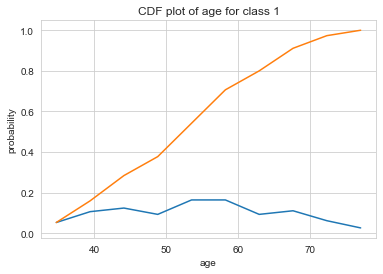

In [24]:
counts , bin_edges = np.histogram(haberman_one['age'],bins=10,density=True)
print('counts       ',counts)
print('bin_edges       ',bin_edges)
pdf = counts / sum(counts)
print('PDF          ',pdf)

print('Cummulative density function')

cdf=np.cumsum(pdf)
print('cdf             ',cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('age')
plt.ylabel('probability')
plt.title('CDF plot of age for class 1')
plt.show()

1) When density = True gives the normalized values( PDF / bin_edge size).
Are bin_edge and bin_width(max-min/bin) the same?
2) Density = False gives number of samples in each bin.
Tried the code given in ipython notes by changing density to False still the output and graph(y-axis remains the same). Not sure why!!

3)In the code given below video what does this line mean?why are we using '=*30' ?
print('='*30, "explaining 'bin edges and counts",'='*30)

[0.01134752 0.02269504 0.02647754 0.01985816 0.03498818 0.03498818
 0.01985816 0.02364066 0.01323877 0.00567376]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
[0.00755858 0.02519526 0.04031242 0.04031242 0.02771479 0.02519526
 0.02015621 0.01007811 0.00503905 0.00251953]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]


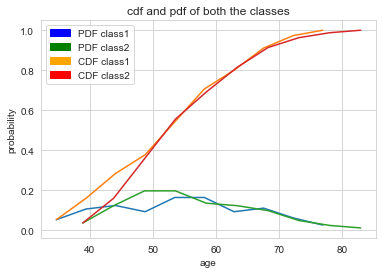

In [25]:
counts, bin_edges = np.histogram(haberman_one['age'],bins=10,density=True)
print(counts)
print(bin_edges)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)
print(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts, bin_edges = np.histogram(haberman_two['age'],bins=10,density=True)
print(counts)
print(bin_edges)
pdf = counts / sum(counts)
print(pdf)
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.xlabel('age')
plt.ylabel('probability')
plt.title('cdf and pdf of both the classes')

blue_patch = mpatches.Patch(color='blue',label = 'PDF class1')
green_patch = mpatches.Patch(color='green',label = 'PDF class2')
orange_patch = mpatches.Patch(color='orange',label = 'CDF class1')
red_patch = mpatches.Patch(color='red',label = 'CDF class2')
plt.legend(handles=[blue_patch,green_patch,orange_patch,red_patch])

plt.show()

Observation:PDF of both classes first intersect at 44, If we take this point then with 30% of probability we can say survival rate are high for age group 10 to 44 and there is 18% of probability of being wrong or errorneous.

for better understanding CDF:

hist,bin_edges = np.histogram([1,1,2,2,2,3],bins=range(5)]
here bins=range(5) means 0 to 1 interval
                         1 to 2  ''
                         2 to 3  ''
                         3 to 4  ''
0 to 1 --> we dont have any points
1 to 2 --> 1,1  } 2
2 to 3 --> 2,2,2 } 3
3 to 4 --> 3   } 1
no.of points present in each bin or counts = [0,2,3,1]


once you mention density = True, it gives the probability value instead of count
if density = False, no of elements present in each bin will be the probability

## Mean,Variance and Standard Deviation

In [26]:
# Mean measures the central tendency
# variance or spread means How far my points typically from mean
# standard deviation : square root of variance
print('mean')
print('mean of class1',np.mean(haberman_one['age']))
print('mean of class1 with outlier',np.mean(np.append(haberman_one['age'],2520)))
# appending one simple number could corrupt my mean a lot
print('mean of class2',np.mean(haberman_two['age']))


print('standard deviation')
print('std of class1',np.std(haberman_one['age']))
print('std of class2',np.std(haberman_two['age']))

mean
mean of class1 52.01777777777778
mean of class1 with outlier 62.93805309734513
mean of class2 53.67901234567901
standard deviation
std of class1 10.98765547510051
std of class2 10.10418219303131


observation:
1. standard deviation of both the classes are nearly same
2. mean for survived and died patients are closer. but by adding an outlier value of 2520 mean gets increased in class1
3. thus, mean can be easily corrupted by outlier

In [27]:
haberman_one.describe()

,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [28]:
haberman_two.describe()

,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


## Median 

In [29]:
# if more than 50% values are corrupted only then median gets corrupted
print('median')
print('median of class1',np.median(haberman_one['age']))
print('median of class1 with outlier',np.median(np.append(haberman_one['age'],50)))
print('median of class 2',np.median(haberman_two['age']))

median
median of class1 52.0
median of class1 with outlier 52.0
median of class 2 53.0


median for class1 with or without outlier is same. there is no effect on each other. thus median cannot be easily corrupted by outlier

IQR is a rule of thumb based method to detect outliers in scalar observations.
LOF is a powerful technique to detect outliers in vector_datapoints based on the density of points

Important Note: When to use mean/median?
the mean is usually the best measure of central tendency to use when your data distribution is continuous and symmetrical,such as when your data is normally distributed.however,it all depends on what your trying to show from your data.

it is usually appropriate to use the mean in such situations where your data is skewed. you would normally choose the median or mode, with the median usually preferred.

## Percentiles and Quantiles

In [30]:
print('90thpercentiles')
print(np.percentile(haberman_one['age'],90))
print(np.percentile(haberman_two['age'],90))

print('85thpercentiles')
print(np.percentile(haberman_one['age'],85))
print(np.percentile(haberman_two['age'],85))



print('quantiles')
print(np.percentile(haberman_one['age'],np.arange(0,100,25)))
print(np.percentile(haberman_two['age'],np.arange(0,100,25)))

90thpercentiles
67.0
67.0
85thpercentiles
64.0
65.0
quantiles
[30. 43. 52. 60.]
[34. 46. 53. 61.]


1.Age at Quantiles of 0%, 25%, 50%, 75% is 30, 43, 52, 60 respectively for class 1 and 34, 46, 53, 61 respectively for class 2.
2.The 90th Percentiles values for class 1 and 2 are 67.0 each.
3.The 85th Percentiles values for class 1 and 2 are 64, 65 respectively.

## Median Absolute Deviation

In [31]:
from statsmodels import robust
print('MAD of class1',robust.mad(haberman_one['age']))
print('MAD of class2',robust.mad(haberman_two['age']))

MAD of class1 13.343419966550417
MAD of class2 11.860817748044816


In [32]:
print('standard deviation')
print('std of class1',np.std(haberman_one['age']))
print('std of class1 with outlier',np.std(np.append(haberman_one['age'],250)))
print('std of class2',np.std(haberman_two['age']))

print(20*'*')
print('MAD of class1 with outlier',robust.mad(np.append(haberman_one['age'],250)))

standard deviation
std of class1 10.98765547510051
std of class1 with outlier 17.11329392263365
std of class2 10.10418219303131
********************
MAD of class1 with outlier 13.343419966550417


## Box Plot with Whiskers 

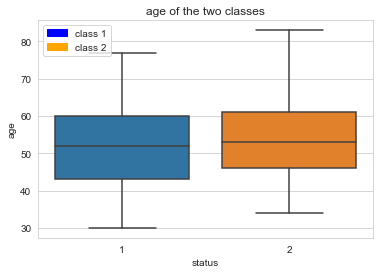

In [44]:
sns.boxplot(data=haberman,x='status',y='age').set_title('age of the two classes')
blue_patch = mpatches.Patch(color='blue',label='class 1')
orange_patch = mpatches.Patch(color='orange',label='class 2')
plt.legend(handles=[blue_patch,orange_patch],loc=2)
plt.show()

objective:1.25% to 75% of class 1 age lies between 43 to 60 and for class 2 between 46 to 62
2.the median of class1 is 52 and class 2 is 54
3.whisker of class 2 is far than class1

## Violin Plot 

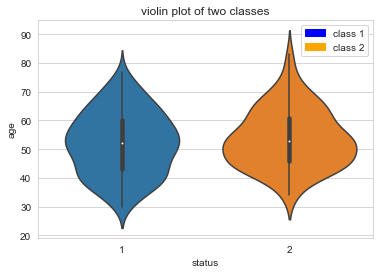

In [51]:
sns.violinplot(data=haberman,x='status',y='age',size=8).set_title('violin plot of two classes')
blue_patch = mpatches.Patch(color='blue',label='class 1')
orange_patch = mpatches.Patch(color='orange',label='class 2')
plt.legend(handles=[blue_patch,orange_patch])
plt.show()

observation: this plot gives the combined information of PDF and box plot.the curve denotes the PDF and middle box denoted the box plot

Note:violin plot help us visualize the PDF in addition to just seeing the 25,50 and 75 percentile values making it more informative. prefer violin plots over box plot as they contain all the info in both a box_plot and a PDF.


if we find more outliers or skewness, then we could expect outliers to be present in the data. this could make the shape of the violin plots much more narrower vertically.

IMP NOTE: violin plot, Box plot, PDF/PMF and CDF are the techniques used in univariate analysis

## Multivariate probability density, Contour plot

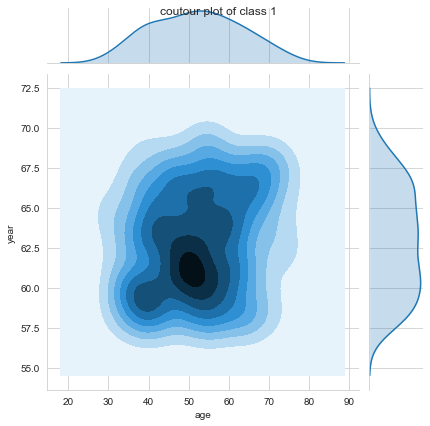

In [63]:
sns.jointplot(data=haberman_one,x='age',y='year',kind='kde')
plt.suptitle('coutour plot of class 1')
plt.show()

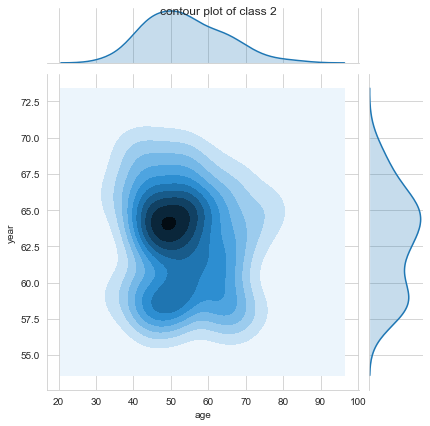

In [64]:
sns.jointplot(data=haberman_two,x='age',y='year',kind='kde')
plt.suptitle('contour plot of class 2')
plt.show()

Observation(s):
The year from 60 to 62 has the age group of patients between 47 to 53 in class 1.
the year from 62.5 to 66 has the age group of patients between 42 to 58 in class 2.
The plot shows the PDF of features on the side.




Conclusions:
With this exploratory data analysis on haberman dataset I understood the importance of EDA before starting any new project in Ml. As it gives us a better understanding of what is the problem and how the data is distributed and what to do in near future.
EDA is very important either we have the domain knowledge or not. As it gives the basic understanding about the problem and data.


I have plot 1-D scatter plot, 2-D scatter Plot, Pair Plot, Histogram, PDF, CDF, Violin plots, Contors-plot, Box plot and calculated Mean, variance, Standard Dev, Median, Quantiles, Percentiles, IQR for the haberman survival dataset.